In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
% matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
import csv
id_to_name = []
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        id_to_name.append(row)
id_to_name = id_to_name[1:]

In [4]:
datagen = ImageDataGenerator(rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,zoom_range=0.2,)

In [5]:
from keras.preprocessing.image import load_img

In [6]:
import pickle
training_file = '../data/train.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train = train['features']
y_train = train['labels']

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


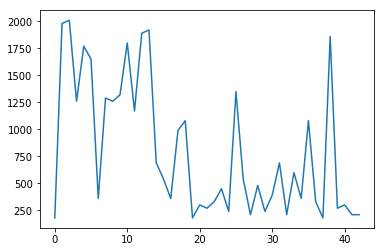

In [7]:
hist = np.histogram(y_train,bins=43)
classes = np.arange(0,43)
plt.plot(classes,hist[0])
print(hist[0])

In [8]:
classes_with_few_image = np.nonzero(hist[0] < 2000)[0]
for sign_class in classes_with_few_image:
  
    indices = np.nonzero(y_train == sign_class)[0]
    train = X_train[indices]
    datagen.fit(train)

    prefix = str(sign_class) + "_"
    num_gen = 2000 - indices.shape[0]

    for batch in datagen.flow(train, batch_size=1,save_to_dir='preview', save_prefix=prefix , save_format='jpg'):
        num_gen -= 1
        if num_gen < 0:
            break  

In [9]:
import os
files = os.listdir('preview')
new_X_train = []
new_y_train = []
for filename in files:
    label = np.uint8(filename.split('__')[0])
    path = 'preview/' + filename
    img = mpimg.imread(path)
    new_X_train.append(img)
    new_y_train.append(label)


In [10]:
new_X_train = np.array(new_X_train).reshape(-1,32,32,3)
new_y_train = np.array(new_y_train)

6


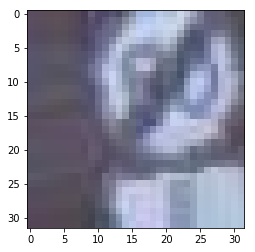

In [11]:
import random
index = random.randint(0,len(new_X_train))
image = new_X_train[index]
print(new_y_train[index])

plt.imshow(image, cmap="gray")